# Answering the Science Question

This notebook answers the science question underlying the design of my Atlantic Ocean regional model.

My science question is **How would ocean currents and sea surface temperature levels be affected if the Northern and Southern hemispheres were flipped?**

First, import packages to re-create and visualize the model fields here:

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

Next, define the location of the project directory for the model:

In [2]:
# define the input directory
project_dir = 'C:/CS185C/spartan/Project'

Then, re-create the model grid

In [3]:
# define the parameters that will be used in the data file
delX = 1/8
delY = 1/8
xgOrigin = -78
ygOrigin = 6
n_rows = 328
n_cols = 568

# recreate the grids that will be used in the model
xc = np.arange(xgOrigin+delX/2, xgOrigin+n_cols*delX, delX)
yc = np.arange(ygOrigin+delY/2, ygOrigin+n_rows*delY+delY/2, delY)
XC, YC = np.meshgrid(xc, yc)

# flip for southern hemisphere
yc_flipped = -yc[::-1]
XC_flipped, YC_flipped = np.meshgrid(xc, yc_flipped)

## Plot a model field at one timestep
To assess the temperature differences spatially, I'll plot the differences between the model results with and without wind. I'll choose one field near the end of my simulation:

In [4]:
# read in the grid with the wind
grid_north = np.fromfile(os.path.join(project_dir,'run','diags',
                                      'T_surf_daily_mean',
                                      'T_surf_daily_mean.0000056736.data'), '>f4')
grid_north = grid_north.reshape((1,n_rows,n_cols))

# read in the grid without the wind
grid_south = np.fromfile(os.path.join(project_dir,'run_southern','diags',
                                      'T_surf_daily_mean',
                                      'T_surf_daily_mean.0000056736.data'), '>f4')
grid_south = grid_south.reshape((1,n_rows,n_cols))
grid_south = np.flipud(grid_south[0])

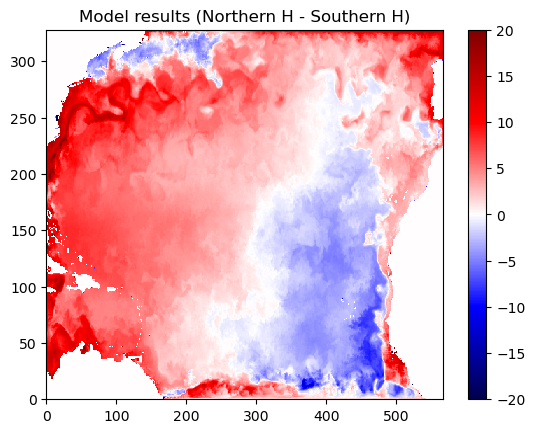

In [5]:
# plot the differences
C = plt.pcolormesh(grid_north[0,:,:-1]-grid_south[:,:-1],
                   cmap='seismic',vmin=-20, vmax=20)
plt.colorbar(C)
plt.title('Model results (Northern H - Southern H)')
plt.show()

In the west coasts, the temperature in the northern model is nearly 20 degrees hotter and in the east coasts, the temperature in the southern model is hotter. This makes sense because the flow of the water is reversed. Water is flowing clockwise in the northern model and counter-clockwise in the southern model.

## Make a timeseries
Next we can see how the differences between the models is evolving through time. For this example, I'll choose a point in the domain near the coast as in my previous notebook:

In [6]:
row = 250
col = 50

Next, I'll define a quick function to convert my iteration numbers to date and time information.

In [7]:
def iter_number_to_date(iter_number,seconds_per_iter=300):
    total_seconds = iter_number*seconds_per_iter
    date = datetime(2016,1,15) + timedelta(seconds=total_seconds)
    return(date)

Then, I'll loop through all of the output files to generate a timeseries:

In [8]:
timestep_dates = []
theta_north_values = []
theta_south_values = []
for file_name in sorted(os.listdir(os.path.join(project_dir,'run_southern','diags','T_surf_daily_mean'))):
    if file_name[-4:]=='data':
        # get the timestep number
        timestep_number = int(file_name.split('.')[-2])
        timestep_dates.append(iter_number_to_date(timestep_number))

        # read in the grid with the wind
        grid_north = np.fromfile(os.path.join(project_dir,'run','diags',
                                             'T_surf_daily_mean',
                                             file_name), '>f4')
        grid_north = grid_north.reshape((1,n_rows,n_cols))
        
        # read in the grid without the wind
        grid_south = np.fromfile(os.path.join(project_dir,'run_southern','diags',
                                              'T_surf_daily_mean',
                                              file_name), '>f4')
        grid_south = grid_south.reshape((1,n_rows,n_cols))

        # flip southern grid
        grid_south = np.flipud(grid_south[0])

        theta_north_values.append(grid_north[0,row,col])
        theta_south_values.append(grid_south[row,col])

Finally, I'll plot the timeseries to see the comparison:

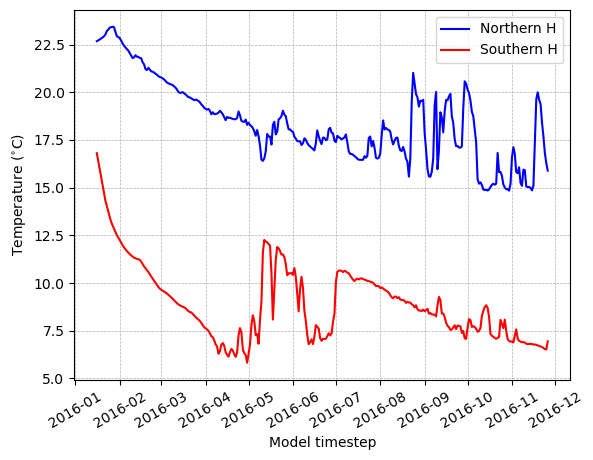

In [9]:
plt.plot(timestep_dates, theta_north_values,'b-',label='Northern H')
plt.plot(timestep_dates, theta_south_values,'r-',label='Southern H')
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Model timestep')
plt.xticks(rotation=30)
plt.legend()
plt.grid(linestyle='--',linewidth=0.5)
plt.show()

My spatial plot shows the effect of the ocean current direction at point near the west coast. In the Northern Hemisphere, the temperature is significantly higher due to water flowing in from the equator. In the Southern Hemisphere, the water flows in from the opposite direction of the equator.